In [31]:
import pandas as pd
from prophet import Prophet

In [32]:
#dtype = {'date': 'datetime'}

df = pd.read_csv('../clean_data/data_modif.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'date': 'ds'})

In [33]:
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['ds'] = df['ds'].dt.date

In [34]:
df = (df.groupby([df['day'], df['month'], df['year']])
  .agg({'ds': 'first','Num_Acc' : 'count'})
  .reset_index()
  .drop(columns=['day', 'month', 'year'])
  .rename(columns={'Num_Acc': 'y'})
)

In [35]:
m = Prophet()
m.fit(df)

12:01:11 - cmdstanpy - INFO - Chain [1] start processing
12:01:11 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = m.make_future_dataframe(periods=3000)
future.tail()

,ds
7077,2027-03-14
7078,2027-03-15
7079,2027-03-16
7080,2027-03-17
7081,2027-03-18


In [46]:
forecast_df = m.predict(future)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7077,2027-03-14,1.385035,-0.362188,3.003485
7078,2027-03-15,1.887568,0.177737,3.632176
7079,2027-03-16,2.099701,0.309018,3.922146
7080,2027-03-17,2.108745,0.349180,3.817965
7081,2027-03-18,2.158600,0.380553,3.916302


In [47]:
forecast_df.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

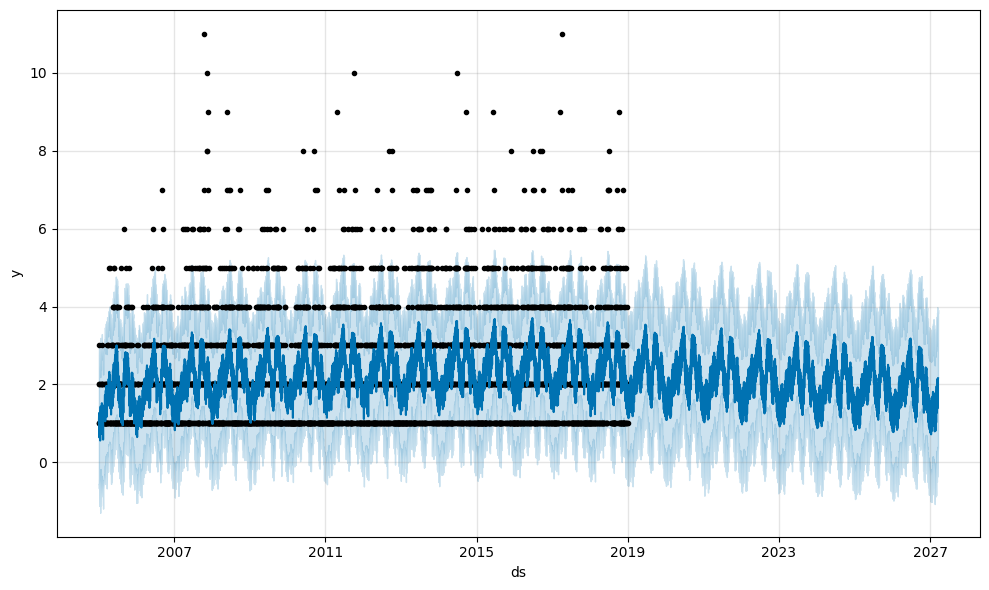

In [48]:
fig1 = m.plot(forecast_df)

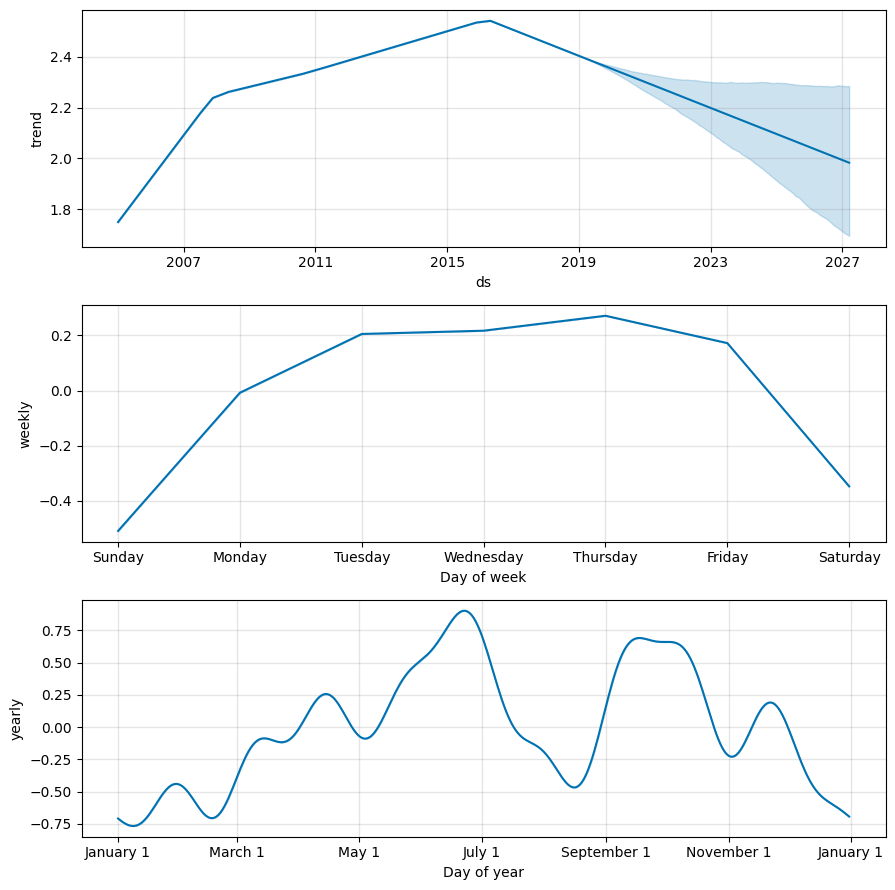

In [49]:
fig2 = m.plot_components(forecast_df);

In [50]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_df)

In [51]:
plot_components_plotly(m, forecast_df)


In [99]:
def predict_n_accidents(d: str, model=m) -> float:
    """
    Takes a date and returns the expected number of accident for this given day.
    """
    _df = pd.DataFrame({'ds': [pd.to_datetime(d).date()]})
    return round(model.predict(_df)['yhat'][0], 2)

In [100]:
predict_n_accidents('2023-12-15')

1.83